# Logistic Regression

### Logistic Regression without data preprocessing

In [1]:
# Importing the necessary packages and dataset
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

import warnings
warnings.filterwarnings("ignore")

#### Step 1-A: Understanding the dataset

In [2]:
wine = load_wine()    # Creating object to load the dataset
print("Description of dataset: ", wine.DESCR)
print("Dimension of independent variables: ", wine.data.shape)
print("Dimension of dependent variable: ", wine.target.shape)
print("Name of variables: ", wine.feature_names)
print("Keys in the dataset: ", wine.keys())

Description of dataset:  .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcali

In [3]:
# Convert the dataset into dataframe
datadf = pd.DataFrame(wine.data)
targetdf = pd.DataFrame(wine.target)

In [4]:
datadf

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [5]:
targetdf

,0
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


#### Step 1-B: Determine missing values

In [6]:
print("Missing values: \n", datadf.isnull().sum())

Missing values: 
 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64


In [7]:
# Using seed function to generate the same dataset
np.random.seed(1000)

In [8]:
# Splitting the independent and dependent variables into training and test dataset
x_trg, x_test, y_trg, y_test = train_test_split(datadf, targetdf, random_state = 0)
print("Dimension of training dataset: ", x_trg.shape)
print("Dimension of test dataset: ", x_test.shape)

Dimension of training dataset:  (133, 13)
Dimension of test dataset:  (45, 13)


#### Step - 2: Model Building

In [9]:
# Creating a logistic regression model
wine_model = LogisticRegression()

In [10]:
# Fitting the model
wine_model.fit(x_trg, y_trg)

LogisticRegression()

In [11]:
# Determine score of training and test dataset
print("Training dataset score: ", wine_model.score(x_trg, y_trg))
print("Test dataset score: ", wine_model.score(x_test, y_test))

Training dataset score:  0.9924812030075187
Test dataset score:  0.9333333333333333


#### Step - 3: Predict and determine the accuracy of the model

In [12]:
pred = wine_model.predict(x_test)

In [13]:
pred

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 1,
       1])

In [14]:
# Determine accuracy using confusion matrix
results = confusion_matrix(y_test, pred)
print("Results of the confusion matrix: \n", results)

Results of the confusion matrix: 
 [[14  2  0]
 [ 0 20  1]
 [ 0  0  8]]


In the above we can see the accuracy of model on `training dataset = 99.2%` and that on `test dataset = 93.3%`. This big difference indicates that the model is `overfitting`. Hence, we need to do some data preprocessing to avoid this situation and increase the accuracy of the model.

### Logistic Regression with data preprocessing

In [15]:
# Import the necessary packages and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

import warnings
warnings.filterwarnings("ignore")

#### Step 1-A: Understanding the dataset

In [16]:
# Created object to store the dataset
wine = load_wine()
print("Dimensions of independent variables: ", wine.data.shape)

Dimensions of independent variables:  (178, 13)


In [17]:
# Convert the dataset into dataframe
datadf = pd.DataFrame(wine.data)
datadf.columns = wine.feature_names
targetdf = pd.DataFrame(wine.target)

In [18]:
datadf

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [19]:
datadf.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [20]:
targetdf

,0
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


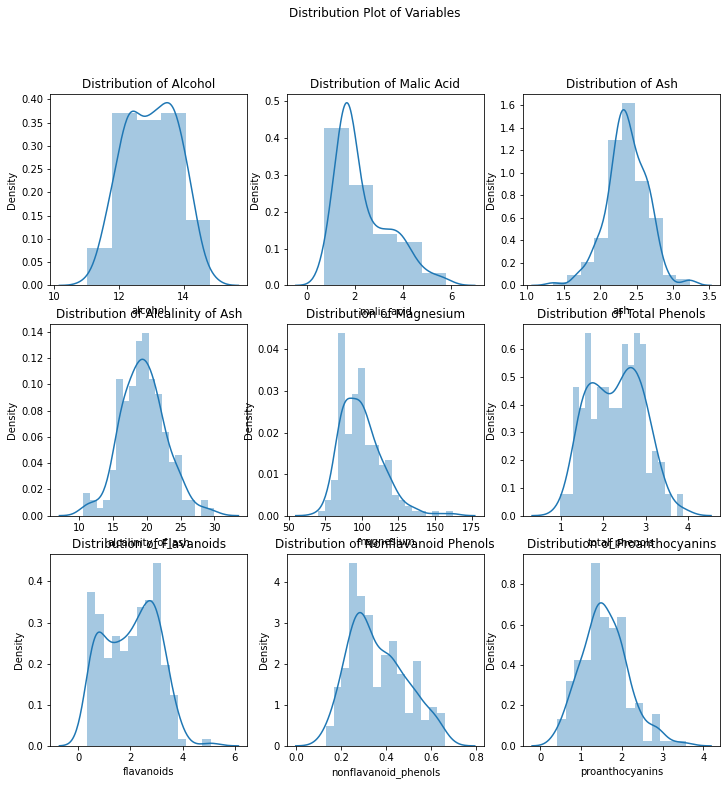

In [21]:
# Creating the distribution plot of variables
plt.figure(1, figsize=(12,12))
plt.subplot(331)
sns.distplot(datadf["alcohol"], bins=5).set_title("Distribution of Alcohol")
plt.subplot(332)
sns.distplot(datadf["malic_acid"], bins=5).set_title("Distribution of Malic Acid")
plt.subplot(333)
sns.distplot(datadf["ash"], bins=10).set_title("Distribution of Ash")
plt.subplot(334)
sns.distplot(datadf["alcalinity_of_ash"], bins=20).set_title("Distribution of Alcalinity of Ash")
plt.subplot(335)
sns.distplot(datadf["magnesium"], bins=20).set_title("Distribution of Magnesium")
plt.subplot(336)
sns.distplot(datadf["total_phenols"], bins=20).set_title("Distribution of Total Phenols")
plt.subplot(337)
sns.distplot(datadf["flavanoids"], bins=15).set_title("Distribution of Flavanoids")
plt.subplot(338)
sns.distplot(datadf["nonflavanoid_phenols"], bins=15).set_title("Distribution of Nonflavanoid Phenols")
plt.subplot(339)
sns.distplot(datadf["proanthocyanins"], bins=15).set_title("Distribution of Proanthocyanins")
plt.suptitle("Distribution Plot of Variables")
plt.show()

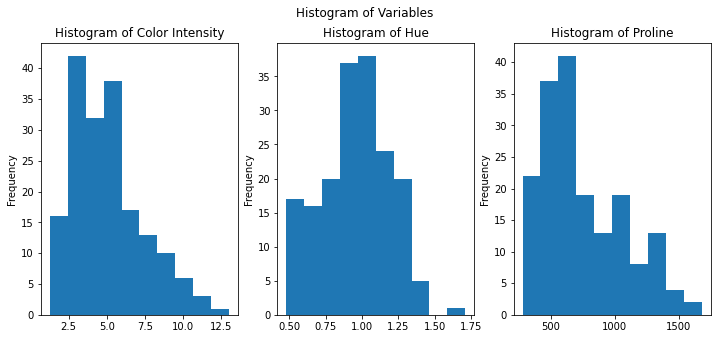

In [22]:
# Creating histogram of variables
plt.figure(2, figsize = (12,5))
plt.subplot(131)
datadf["color_intensity"].plot.hist(bins = 10).set_title("Histogram of Color Intensity")
plt.subplot(132)
datadf["hue"].plot.hist(bins = 10).set_title("Histogram of Hue")
plt.subplot(133)
datadf["proline"].plot.hist(bins = 10).set_title("Histogram of Proline")
plt.suptitle("Histogram of Variables")
plt.show()

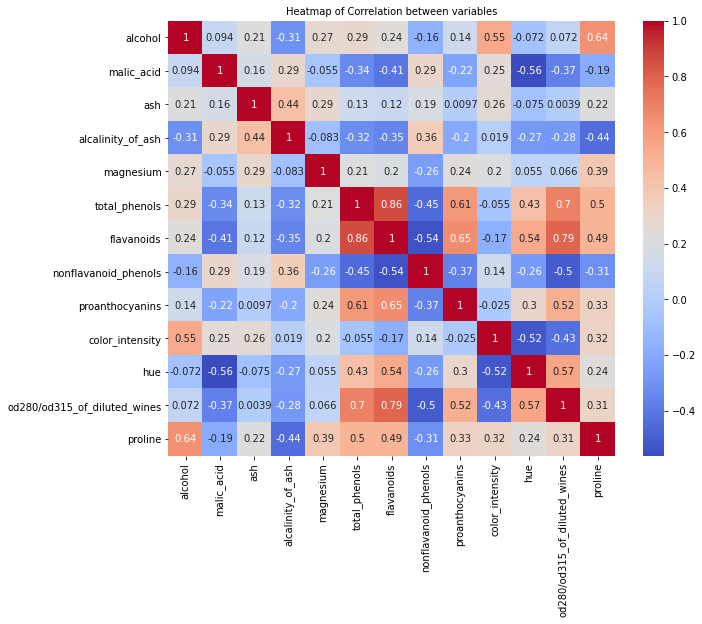

In [23]:
# Creating a heatmap to understand the correlations
sns.heatmap(datadf.corr(), annot = True, cmap = "coolwarm")
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.title("Heatmap of Correlation between variables", fontsize = 10)
plt.show()

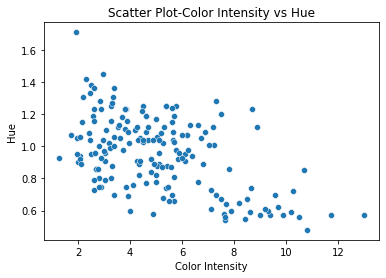

In [24]:
# Scatter plot between color_intensity and hue
sns.scatterplot(x ="color_intensity", y ="hue", data=datadf).set_title("Scatter Plot-Color Intensity vs Hue")
plt.xlabel("Color Intensity")
plt.ylabel("Hue")
plt.show()

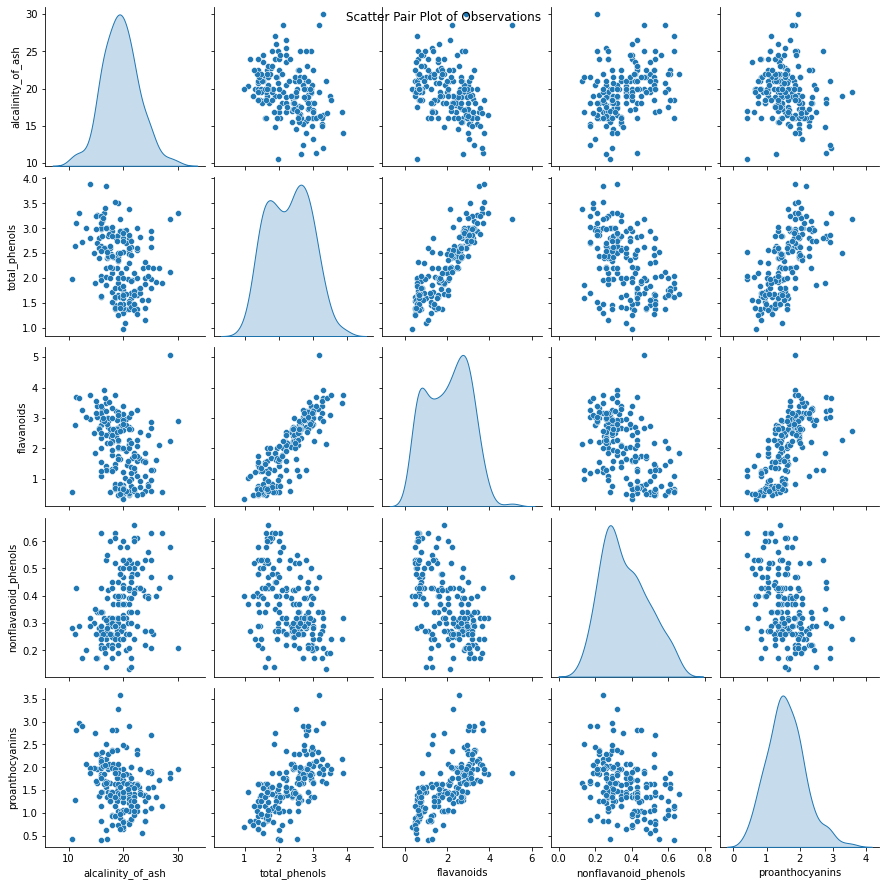

In [25]:
# Scatter plot considering kde as diagonal plot
sns.pairplot(datadf[["alcalinity_of_ash", "total_phenols", "flavanoids", "nonflavanoid_phenols",
                    "proanthocyanins"]], kind = "scatter", diag_kind = "kde")
plt.suptitle("Scatter Pair Plot of Observations")
plt.show()

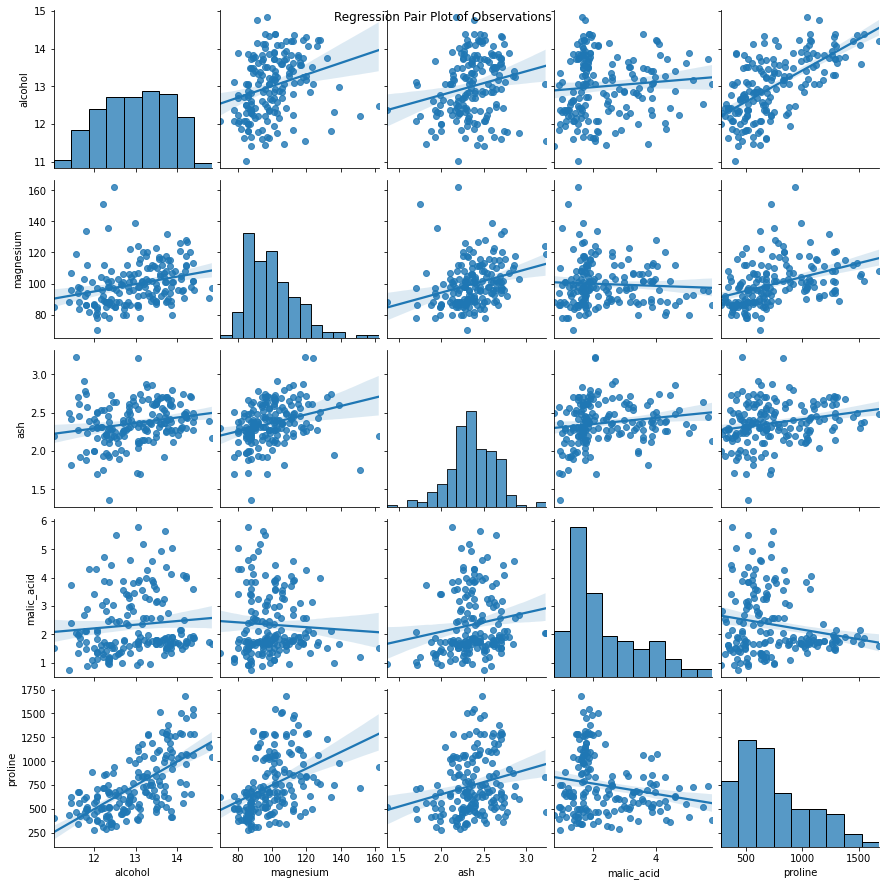

In [26]:
# Regression pair plot considering histogram as diagonal plot
sns.pairplot(datadf[["alcohol", "magnesium", "ash", "malic_acid", "proline"]], diag_kind ="hist", kind ="reg")
plt.suptitle("Regression Pair Plot of Observations")
plt.show()

#### Step 1-B: Determine Missing Values

In [27]:
print("Missing values: \n", datadf.isnull().sum())

Missing values: 
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


#### Step 1-C: Assumptions Check - Normality Assumption: Determine the normality of data

In [28]:
# Import the necessary packaga
from scipy import stats

In [29]:
print("Skewness of data: \n", stats.skew(datadf))
print("Kurtosis of data: \n", stats.kurtosis(datadf))

Skewness of data: 
 [-0.05104747  1.0308695  -0.17520678  0.21124733  1.08891489  0.08590677
  0.02512948  0.44634901  0.51276903  0.86124805  0.02091312 -0.30468993
  0.76133617]
Kurtosis of data: 
 [-0.8622601   0.25734829  1.07857613  0.44082314  2.01280601 -0.8458573
 -0.88936501 -0.65295221  0.50567101  0.33736976 -0.3680254  -1.08967533
 -0.27499971]


In [30]:
# Determine the outliers by calculating the z-score
zscore = np.abs(stats.zscore(datadf))
print("The z-score of data: \n", zscore)

The z-score of data: 
 [[1.51861254 0.5622498  0.23205254 ... 0.36217728 1.84791957 1.01300893]
 [0.24628963 0.49941338 0.82799632 ... 0.40605066 1.1134493  0.96524152]
 [0.19687903 0.02123125 1.10933436 ... 0.31830389 0.78858745 1.39514818]
 ...
 [0.33275817 1.74474449 0.38935541 ... 1.61212515 1.48544548 0.28057537]
 [0.20923168 0.22769377 0.01273209 ... 1.56825176 1.40069891 0.29649784]
 [1.39508604 1.58316512 1.36520822 ... 1.52437837 1.42894777 0.59516041]]


In [31]:
# Determine the data indexes where z-score > 3
outlier_list = np.where(zscore > 3)
print("The indexes of outliers: \n", outlier_list[0])
print("The number of outliers: \n", len(outlier_list[0]))

The indexes of outliers: 
 [ 25  59  69  73  95 110 115 121 121 123 158]
The number of outliers: 
 11


In [32]:
# Remove the outliers from the dataset
datadf = datadf[(zscore < 3).all(axis=1)]
print("Dimension after removing the outliers: ", datadf.shape)

Dimension after removing the outliers:  (168, 13)


In [33]:
# Removing the corresponding rows from the target dataset as well
targetdf = targetdf.drop(index=outlier_list[0])

#### Step 1-D: Feature Extraction

In [34]:
# Import necessary packages
from sklearn.preprocessing import StandardScaler

In [35]:
sc = StandardScaler()
datadf = sc.fit_transform(datadf)

#### Step 2: Model Building

In [36]:
# Using seed function to generate the same dataset
np.random.seed(1000)

In [37]:
# Splitting the independent and dependent variables to training and test datasets
x_trg, x_test, y_trg, y_test = train_test_split(datadf, targetdf, random_state = 0)
print("Dimensions of training dataset: ", x_trg.shape)
print("Dimensions of test dataset: ", x_test.shape)

Dimensions of training dataset:  (126, 13)
Dimensions of test dataset:  (42, 13)


In [38]:
# Creating a logistic regression model
wine_model_2 = LogisticRegression()

In [39]:
# Fitting the model
wine_model_2.fit(x_trg, y_trg)

LogisticRegression()

In [40]:
# Determine score of training and test dataset
print("Training dataset score: ", wine_model_2.score(x_trg, y_trg))
print("Test dataset score: ", wine_model_2.score(x_test, y_test))

Training dataset score:  1.0
Test dataset score:  1.0


#### Step 3: Predicing via model and determine the accuracy of the model

In [41]:
pred = wine_model_2.predict(x_test)

In [42]:
pred

array([2, 0, 2, 1, 1, 0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1,
       2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 2, 2])

#### Step 4: Determine the accuracy of the model using Confusion Matrix

In [43]:
results = confusion_matrix(y_test, pred)
print("Results of the Consufion Matrix: ", results)

Results of the Consufion Matrix:  [[14  0  0]
 [ 0 15  0]
 [ 0  0 13]]


Here, we know that normality of the data can be determined by `skewness` and `kurtosis`. We saw that both the values lies nearly between -1.0 and +1.0. We can consider this to be normally distributed. When we tried to increase the normality we identified 11 outliers by applying z-score. We had removed them from both independent and dependent dataframes respectively which resulted in change of their dimensions too. Feature engineering technique is performed to scale the data. The model is built and prediction has been done. We can see that the accuracy of the model for both training and test dataset is increased to 100% which is **excellent**. So we can say that after performing data preprocessing we avoided the overfitting of the model and increased the accuracy too.